<a href="https://colab.research.google.com/github/hellen2021/House-pricing-Hass-Consulting-Company/blob/main/Resubmission_week6_IP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# House Pricing for Hass Consulting Company
### 1. Defining the question
As a data scientist, I have been tasked to study the factors that affect housing prices(for Hass Consulting Company) using the given information on real estate properties that was collected over the past few months
### 2. Defining the metric of success
This project will a success if I am able to obtain a model with the lowest error rate, e.g RMSE, as possible. 
The algorithms to be used for modelling are as follows:

*   Multiple Linear Regression
*   Quantile Regression
*   Ridge Regression
*   Lasso Regression
*   Elastic Net Regression

### 3. Understanding the context
### 4. Recording experimental designs
*   Reading the data
*   Data exploration
*   Data cleaning
*   Perform EDA
*   Modelling
*   Evaluation of the model

### 7. Challenging the solution
### 8. Follow up questions

## Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import scipy as sp
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge, ElasticNet, Lasso
import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error,r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Reading the data

In [2]:
# load the dataset
housing = pd.read_csv('http://bit.ly/IndependentProjectWeek7Dataset')

## Data Exploration

In [3]:
# preview the top 5 records
housing.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
# # preview the bottom 5 records
housing.tail()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,325000.0,2,0.75,1020,1076,2.0,0,0,3,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [5]:
housing['price'].max()

7700000.0

House description

*   Id 
*   price  - Price of the house
*   bedrooms - Number of Bedrooms
*   bathrooms - Number of Bathrooms
*   sqft_living - Square feet area of living area
*   sqft_lot  - Square feet area of parking Layout
*   floors - Number of Floors
*   waterfront - Whether waterfront is there or not
*   view - Number of Views
*   grade - Grades
*   sqft_above
*   sqft_basement - Square feet area off basement
*   yr_built - Year the house is built
*   yr_renovated - Year the house is renovated
*   zipcode - zipcode os the house
*   lat : Latitude of the house
*   lon : Longitude of the house
*   sqft_living15
*   sqft_lot15


In [6]:
# shape of the data
print('The dataset consist of',housing.shape[0], 'rows and', housing.shape[1], 'columns')

The dataset consist of 21613 rows and 20 columns


In [7]:
# info
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float64
 18  sqft_l

In [8]:
# from the info above we can know the data type and the number of non null values of each column
# all the columns' data types are numerical

In [9]:
# check if there are duplicates
housing.duplicated().sum()
print('There are', housing.duplicated().sum(), 'duplicated rows')

There are 3 duplicated rows


In [10]:
# check for missing values
print(housing.isnull().sum())

print('There are no missing values')

id               0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64
There are no missing values


In [11]:
# there are no missing values, however, we can check for unique values in every column in order to ascertain that

In [12]:
# validity
# using a for loop to iterate through each column and print out the unique values
for column in housing.columns:           
  print(column)                       
  print(housing[column].unique())        
  print(housing[column].nunique()) 
  print('\n............................') 

id
[7129300520 6414100192 5631500400 ... 1523300141  291310100 1523300157]
21436

............................
price
[221900. 538000. 180000. ... 541800. 610685. 402101.]
3625

............................
bedrooms
[ 3  2  4  5  1  6  7  0  8  9 11 10 33]
13

............................
bathrooms
[1.   2.25 3.   2.   4.5  1.5  2.5  1.75 2.75 3.25 4.   3.5  0.75 4.75
 5.   4.25 3.75 0.   1.25 5.25 6.   0.5  5.5  6.75 5.75 8.   7.5  7.75
 6.25 6.5 ]
30

............................
sqft_living
[1180 2570  770 ... 3087 3118 1425]
1038

............................
sqft_lot
[ 5650  7242 10000 ...  5813  2388  1076]
9782

............................
floors
[1.  2.  1.5 3.  2.5 3.5]
6

............................
waterfront
[0 1]
2

............................
view
[0 3 4 2 1]
5

............................
condition
[3 5 4 1 2]
5

............................
grade
[ 7  6  8 11  9  5 10 12  4  3 13  1]
12

............................
sqft_above
[1180 2170  770 1050 1680 3890 1715 1060

In [13]:
# from above we can notice that the unique values in all the columns are valid

## Data Cleaning

In [14]:
# Completeness : there are no missing values
# Validity : there are some irrelevant columns, we shall check for syntax errors(eg. whitespaces)
# Consistency : there are duplicate values, however, we shall not drop them because they are possibly true values, there could be similar houses
# Uniformity : all columns are the right data type, and the columns names are in order
# we shall check on the outliers, if there are any, during EDA and handle them if any

In [15]:
# remove the whitespaces if any
housing.columns.str.replace(' ', '')

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [16]:
# handling the irrelevant columns by dropping them
# house price cannot be determined by the house ID, zipcode, lon, lat

housing.drop(columns = ['id', 'zipcode', 'long', 'lat'], inplace =True)


## Exploratory Data Analysis

### 1. Univariate Analysis

In [17]:
# check the measures of central tendency and dispersion
housing.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.401822e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,1986.552492,12768.455652
std,3.673622e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,6210.000000,871200.000000


In [18]:
# from the description above, we can obtain information such as the maximun/minimum house price, the mean of house prices and that of other variables like bedrooms,
# for example the maximum number of bedrooms is 33 and the minimum is 0

In [19]:
# # function to plot bars
# def plot_bar(data, column):
#   plt.figure(figsize=(8, 6))
#   data[column].value_counts().sort_index().plot.bar()
#   plt.title('Count of', str(column))
#   plt.xlabel('No. of', column)
#   plt.ylabel('No. of Houses')
#   plt.show()

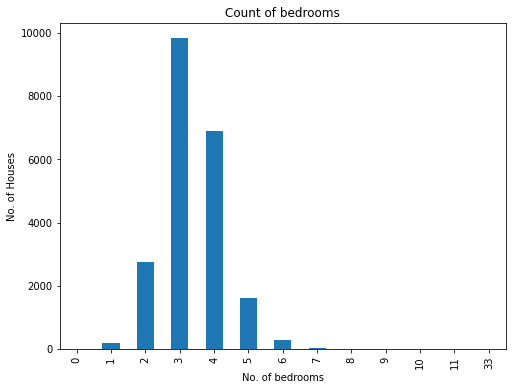

In [20]:
# bar chart to display the number of bedrooms
plt.figure(figsize=(8, 6))
housing['bedrooms'].value_counts().sort_index().plot.bar()
plt.title('Count of bedrooms')
plt.xlabel('No. of bedrooms')
plt.ylabel('No. of Houses')
plt.show()
# We notice that most houses habe 3 bedrooms

We notice that most houses habe 3 bedrooms

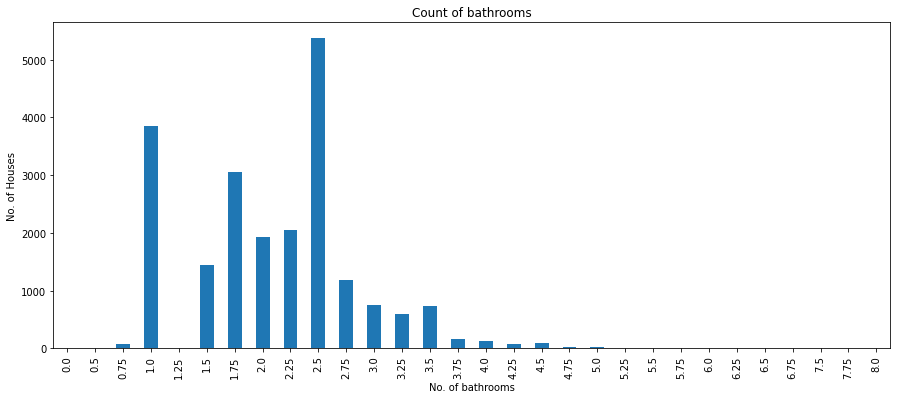

In [21]:
# bar chart to display the number of bathrooms
plt.figure(figsize=(15, 6))
housing['bathrooms'].value_counts().sort_index().plot.bar()
plt.title('Count of bathrooms')
plt.xlabel('No. of bathrooms')
plt.ylabel('No. of Houses')
plt.show()

# we notice that the number of bathrooms for all houses ranges between 1 and 5

We notice that the number of bathrooms for all houses ranges between 1 and 5

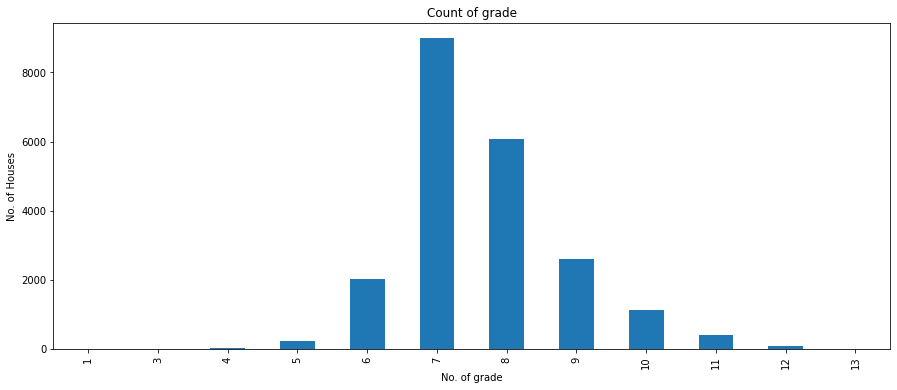

In [22]:
# bar chart to display the number of grade
plt.figure(figsize=(15, 6))
housing['grade'].value_counts().sort_index().plot.bar()
plt.title('Count of grade')
plt.xlabel('No. of grade')
plt.ylabel('No. of Houses')
plt.show()


Most houses lie on grade 7

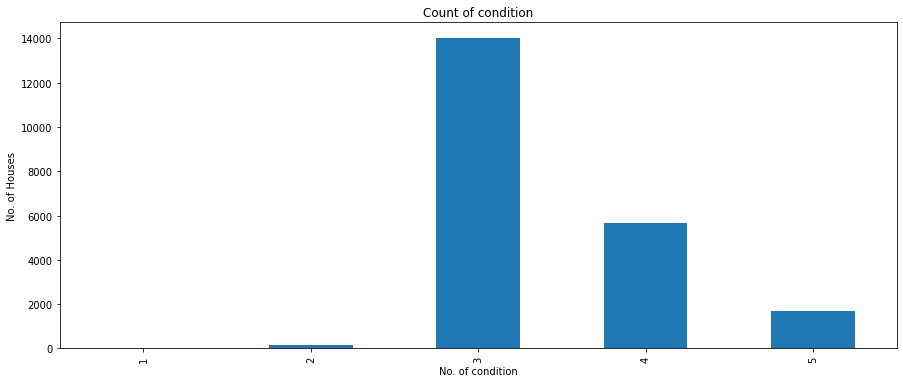

In [23]:
# bar chart to display the number of condition
plt.figure(figsize=(15, 6))
housing['condition'].value_counts().sort_index().plot.bar()
plt.title('Count of condition')
plt.xlabel('No. of condition')
plt.ylabel('No. of Houses')
plt.show()


Most houses have a condition level of 3

## Bivariate Analysis


Since all our columns are in numerical data types, we shall perform bivariate on numerical vs numerical variables only

### Numerical vs numerical

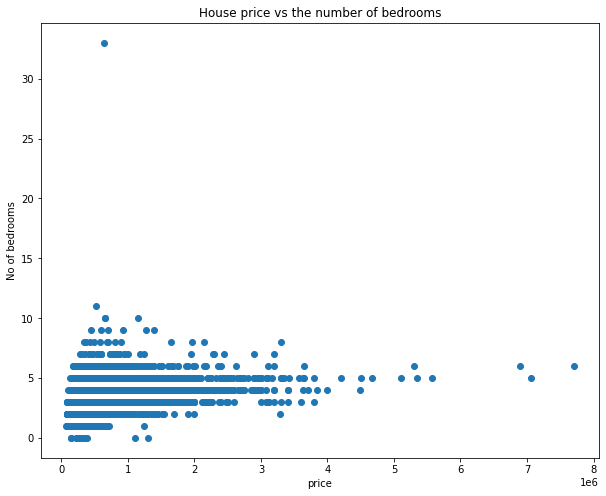

In [24]:
# price of the house vs no of bedrooms
plt.figure(figsize=(10, 8))
plt.scatter('price', 'bedrooms', data = housing)
plt.title('House price vs the number of bedrooms')
plt.xlabel('price')
plt.ylabel('No of bedrooms')
plt.show()

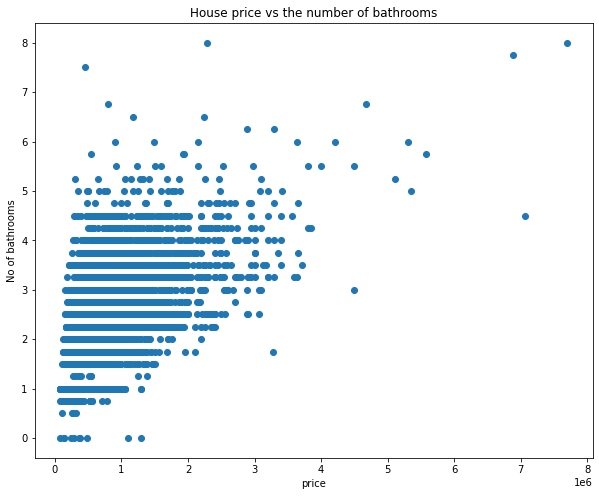

In [25]:
# price of the house vs no of bathrooms
plt.figure(figsize=(10, 8))
plt.scatter('price', 'bathrooms', data = housing)
plt.title('House price vs the number of bathrooms')
plt.xlabel('price')
plt.ylabel('No of bathrooms')
plt.show()

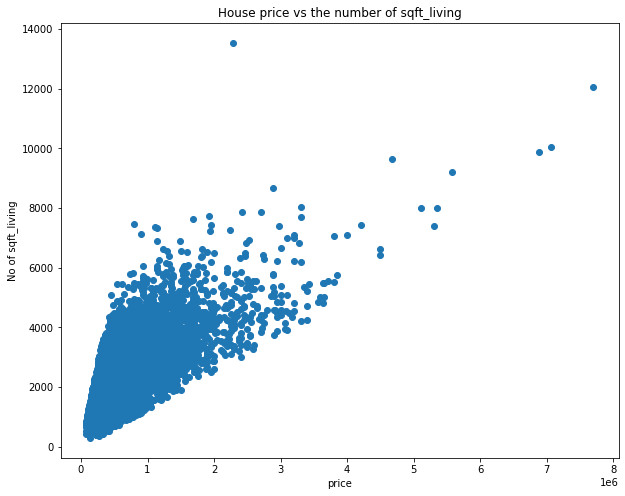

In [26]:
# price of the house vs no of sqft_living
plt.figure(figsize=(10, 8))
plt.scatter('price', 'sqft_living', data = housing)
plt.title('House price vs the number of sqft_living')
plt.xlabel('price')
plt.ylabel('No of sqft_living')
plt.show()

There is a linear relationship between the sqft of the living area vs the price of the house 

In [27]:
housing.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'sqft_living15',
       'sqft_lot15'],
      dtype='object')

In [28]:
# correlation
corr = housing.corr()
corr

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
price,1.000000,0.308338,0.525134,0.702044,0.089655,0.256786,0.266331,0.397346,0.036392,0.667463,0.605566,0.323837,0.053982,0.126442,0.585374,0.082456
bedrooms,0.308338,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,0.391638,0.029244
bathrooms,0.525134,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,0.568634,0.087175
sqft_living,0.702044,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,0.756420,0.183286
sqft_lot,0.089655,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,0.144608,0.718557
floors,0.256786,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,0.279885,-0.011269
waterfront,0.266331,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.086463,0.030703
view,0.397346,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.280439,0.072575
condition,0.036392,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,-0.092824,-0.003406
grade,0.667463,0.356967,0.664983,0.762704,0.113621,0.458183,0.082775,0.251321,-0.144674,1.000000,0.755923,0.168392,0.446963,0.014414,0.713202,0.119248


## Multicollinearity

In [29]:
# check for the independent variable only
# so drop the target variable
house = housing.drop('price', axis = 1)
correlation = house.corr()
correlation

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
bedrooms,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,0.391638,0.029244
bathrooms,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,0.568634,0.087175
sqft_living,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,0.756420,0.183286
sqft_lot,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,0.144608,0.718557
floors,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,0.279885,-0.011269
waterfront,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.086463,0.030703
view,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.280439,0.072575
condition,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,-0.092824,-0.003406
grade,0.356967,0.664983,0.762704,0.113621,0.458183,0.082775,0.251321,-0.144674,1.000000,0.755923,0.168392,0.446963,0.014414,0.713202,0.119248
sqft_above,0.477600,0.685342,0.876597,0.183512,0.523885,0.072075,0.167649,-0.158214,0.755923,1.000000,-0.051943,0.423898,0.023285,0.731870,0.194050


### Variance Inflation Factor(VIF)

In [30]:
# compute VIF and drop one of the variables whose VIF > 5
pd.DataFrame(np.linalg.inv(correlation.values), index = correlation.index, columns=correlation.columns)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
bedrooms,1.644100,-0.460756,1.268556e-02,0.044613,0.070495,0.061553,0.117238,-0.065090,0.326360,-9.115111e-01,-4.829064e-01,0.092786,0.039624,0.012394,0.082102
bathrooms,-0.460756,3.347865,-8.516564e-02,-0.019235,-0.681459,0.009193,-0.038569,-0.136328,-0.288383,-1.171027e+00,-1.032633e+00,-0.916265,-0.257377,0.096078,0.076647
sqft_living,0.026077,-0.078057,-1.486117e+14,-0.196977,1.876379,-0.012783,-0.017979,0.151424,0.476640,1.339923e+14,7.161248e+13,-0.000718,-0.087619,0.071589,0.509048
sqft_lot,0.044613,-0.019235,-1.997270e-01,2.088121,0.074269,0.028201,-0.051921,0.019180,-0.006188,-5.587127e-02,7.431216e-02,0.026167,0.012555,0.127203,-1.474750
floors,0.070495,-0.681459,1.878315e+00,0.074269,1.931951,-0.003745,-0.063278,0.132731,-0.326791,-2.131861e+00,-3.433634e-01,-0.301643,-0.057515,0.358900,0.101125
waterfront,0.061553,0.009193,-1.533233e-02,0.028201,-0.003745,1.203090,-0.493279,-0.015109,0.047894,-9.583270e-02,3.839183e-03,-0.021863,-0.065741,0.057360,-0.016921
view,0.117238,-0.038569,-9.587251e-03,-0.051921,-0.063278,-0.493279,1.404261,-0.008449,-0.184212,5.594525e-02,-2.668277e-01,0.198828,-0.035142,-0.264402,0.001930
condition,-0.065090,-0.136328,1.499883e-01,0.019180,0.132731,-0.015109,-0.008449,1.221646,-0.016421,-1.024127e-01,-1.437921e-01,0.472716,0.194776,0.036010,-0.037954
grade,0.326360,-0.288383,5.016141e-01,-0.006188,-0.326791,0.047894,-0.184212,-0.016421,3.234590,-1.935576e+00,-7.974028e-01,-0.397215,-0.040709,-0.828841,0.120063
sqft_above,-0.908962,-1.188378,1.339923e+14,-0.057671,-2.129120,-0.098076,0.062929,-0.104488,-1.912104,-1.208111e+14,-6.456774e+13,0.347426,0.056751,-1.675484,-0.672825


Variables with VIF > 5 include: sqft_lot15 vs sqft_living,  grade vs sqft_living,  yr_renovated vs sqft_above,  view vs sqft_above,  sqft_basement vs sqft_lot,  sqft_basement vs sqft_living

---



In [31]:
# drop one variable for every pairs with vif > 5
housing.drop(columns = ['sqft_lot15', 'grade', 'yr_renovated', 'view', 'sqft_basement'], inplace = True)

## Residual PLots and Heteroskedasticity

In [32]:
housing.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'condition', 'sqft_above', 'yr_built', 'sqft_living15'],
      dtype='object')

In [33]:
# separate independent from dependent variables
x = housing[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'condition', 'sqft_above', 'yr_built', 'sqft_living15']]
y = housing['price']

# split the data into train test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 2)

In [34]:
# instantiate the model
regressor = LinearRegression()

# fit into the model
regressor.fit(x_train, y_train)

# predict
y_predict = regressor.predict(x_test)

# residual
residuals = np.subtract(y_predict, y_test)

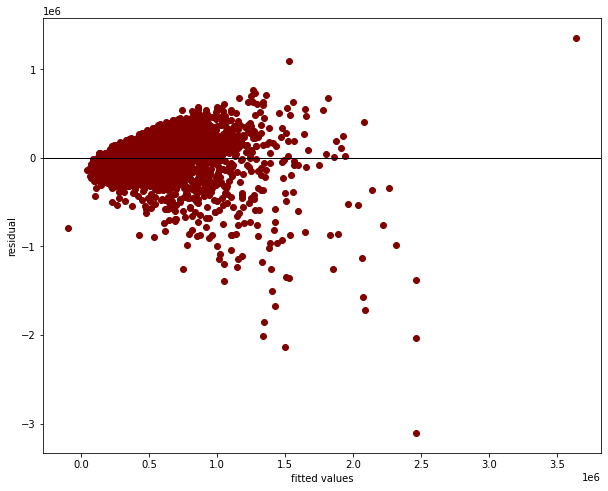

In [35]:
# plot the residual plot
plt.figure(figsize = (10,8))
plt.scatter(y_predict, residuals, color='maroon')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='black', linewidth=1)
plt.show()


In [36]:
# Heteroskedasticity using Barlett's test

test_result, p_value = sp.stats.bartlett(y_predict, residuals)

#compute a critical value of the chi squared distribution
degree_of_freedom = len(y_predict)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print(critical_value)

if (test_result > critical_value):
  print('the variances are unequal, and the model should be reassessed')
else:
  print('the variances are homogeneous!')

# whenever the test_result is greater than the critical value, then we reject our null hypothesis


inf
the variances are homogeneous!


## Modelling
### 1. Multiple Linear Regression

In [37]:
# since we had split the dataset while plotting the residuals, we will use that

# so let us just fit into the model and check the performance of the multiple linear regression model

regressor = LinearRegression()  
regressor.fit(x_train, y_train)

# predict
y_predict = regressor.predict(x_test)


In [38]:
# performance of the model
print('Mean Absolute Error:', mean_absolute_error(y_test, y_predict))  
print('rmse:', np.sqrt(mean_squared_error(y_test, y_predict)))
print('r2_score:', r2_score(y_test, y_predict))

Mean Absolute Error: 153829.0994344607
rmse: 232234.65536875316
r2_score: 0.6141477794946179


We will have to model using other algorithms in order to comment on this

This will be the base model, with RMSE ~ 232,234

In [39]:
# coefficients
regressor.coef_

array([-5.83754103e+04,  6.62520538e+04,  2.48312476e+02, -3.19882827e-01,
        6.36135909e+04,  7.09669264e+05,  1.86806121e+04, -9.06730547e+00,
       -3.26513941e+03,  8.50805732e+01])

In [40]:
# regressor score
regressor.score(x_train,y_train)

0.5930878818254872

### 2. Quantile Regression

In [41]:
housing.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'condition', 'sqft_above', 'yr_built', 'sqft_living15'],
      dtype='object')

In [42]:
# We will use the python package statsmodels for Quantile Regression
#
import statsmodels.formula.api as smf

# split into dependent and dependent
x = housing.drop('price', axis = 1)
y = housing['price']

# split into train and test data
x_train, x_test, y_train, y_test = train_test_split(x,y ,test_size=0.2, random_state=2)

# Finding the regression coefficients for the conditioned median, 0.5 quantile
#
mod = smf.quantreg('y ~ x', housing)
res = mod.fit(q=.5)

# Then print out the summary of our model
#
print(res.summary())

# our intercept is  4.063e+06  
#  Pseudo R-squared is 0.3312

                         QuantReg Regression Results                          
Dep. Variable:                      y   Pseudo R-squared:               0.3312
Model:                       QuantReg   Bandwidth:                   2.730e+04
Method:                 Least Squares   Sparsity:                    3.825e+05
Date:                Sat, 07 May 2022   No. Observations:                21613
Time:                        18:01:49   Df Residuals:                    21602
                                        Df Model:                           10
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.063e+06   1.15e+05     35.407      0.000    3.84e+06    4.29e+06
x[0]       -4.533e+04   1765.964    -25.670      0.000   -4.88e+04   -4.19e+04
x[1]        3.029e+04   3048.576      9.935      0.000    2.43e+04    3.63e+04
x[2]         201.5716      3.959     50.920      0.0

In [43]:
# we can do the same for different quantiles

# 0.25
mod = smf.quantreg('y ~ x', housing)
res = mod.fit(q=.25)

# Then print out the summary of our model
#
print(res.summary())

# our intercept is  2.131e+06 
#  Pseudo R-squared is 0.2519

                         QuantReg Regression Results                          
Dep. Variable:                      y   Pseudo R-squared:               0.2519
Model:                       QuantReg   Bandwidth:                   2.448e+04
Method:                 Least Squares   Sparsity:                    4.167e+05
Date:                Sat, 07 May 2022   No. Observations:                21613
Time:                        18:01:59   Df Residuals:                    21602
                                        Df Model:                           10
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.131e+06      1e+05     21.265      0.000    1.93e+06    2.33e+06
x[0]       -3.047e+04   1593.090    -19.128      0.000   -3.36e+04   -2.73e+04
x[1]        1.691e+04   2788.927      6.064      0.000    1.14e+04    2.24e+04
x[2]         149.3648      3.774     39.573      0.0

In [44]:
# we can do the same for different quantiles

# 0.75
mod = smf.quantreg('y ~ x', housing)
res = mod.fit(q=.75)

# Then print out the summary of our model
#
print(res.summary())

# our intercept is  3.041e+06 
# Pseudo R-squared is 0.3930

                         QuantReg Regression Results                          
Dep. Variable:                      y   Pseudo R-squared:               0.3930
Model:                       QuantReg   Bandwidth:                   2.507e+04
Method:                 Least Squares   Sparsity:                    5.118e+05
Date:                Sat, 07 May 2022   No. Observations:                21613
Time:                        18:02:09   Df Residuals:                    21602
                                        Df Model:                           10
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3.041e+06   1.54e+05     19.775      0.000    2.74e+06    3.34e+06
x[0]       -5.066e+04   2327.755    -21.763      0.000   -5.52e+04   -4.61e+04
x[1]        1.213e+04   3793.457      3.198      0.001    4695.041    1.96e+04
x[2]         270.7318      4.894     55.323      0.0

### 3. Ridge Regression

In [45]:
# split into dependent and dependent
x = housing.drop('price', axis = 1)
y = housing['price']

# In order to create our ridge model we need to first determine the most appropriate value for the l2 regularization. 
# L2 is the name of the hyperparameter that is used in ridge regression. 
# Determining the value of a hyperparameter requires the use of a grid.

ridge = Ridge()
search = GridSearchCV(estimator=ridge,param_grid={'alpha':np.logspace(-5,2,8)},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

# fit the function to searh for the best parameters
search.fit(x,y)
print(search.best_params_)
{'alpha': 0.01}
abs(search.best_score_) 

# The best_params_ tells us what to set alpha too which in this case is 1.0. 
# The best_score_ tells us what the best possible mean squared error is 55218959186.517845, which is way far than that of the base model

{'alpha': 1.0}


55218959186.517845

In [46]:
# We can confirm this by fitting our model with the ridge information and finding the mean squared error below
#
ridge = Ridge(normalize = True, alpha=1.0)
ridge.fit(x,y)
ridge_model = (mean_squared_error(y_true=y,y_pred=ridge.predict(x)))
print(ridge_model)

66507718836.73333


The RMSE we find for this model is far worse that the base model, which was 232234

### 4. Lasso Regression

In [47]:
# split into dependent and dependent
x = housing.drop('price', axis = 1)
y = housing['price']

# Standadizing our features
#
scaler = StandardScaler()
x_std = scaler.fit_transform(x)
                            
# Splitting the data into training and test sets
#
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=101)
parameters = {'alpha': np.concatenate((np.arange(0.1,2,0.1), np.arange(2, 5, 0.5), np.arange(5, 25, 1)))}


# building Lasso, 
linear = LinearRegression()
lasso = Lasso() 
gridlasso = GridSearchCV(lasso, parameters, scoring ='r2') 


# and choosing the regularization parameter with the help of GridSearch. 
# For that, we have to define the set of parameters for GridSearch. 
# In this case, a model with the highest R-squared score will give us the best parameters.
# 

# Fitting models and print the best parameters, R-squared scores, MSE, and coefficients
gridlasso.fit(x_train, y_train) 


print("lasso best parameters:", gridlasso.best_params_) 
print("lasso score:", gridlasso.score(x_test, y_test))

print("lasso MSE:", mean_squared_error(y_test, gridlasso.predict(x_test)))
print("lasso best estimator coef:", gridlasso.best_estimator_.coef_)


lasso best parameters: {'alpha': 24.0}
lasso score: 0.6139242049078963
lasso MSE: 54809973246.659386
lasso best estimator coef: [-6.13732406e+04  6.15835261e+04  2.41224590e+02 -2.60423030e-01
  6.33739986e+04  7.01719855e+05  2.13382815e+04 -1.55058003e+00
 -3.24088643e+03  9.09278756e+01]


In [48]:
# Fit lasso regression with the best alpha found above
lasso = Lasso(normalize=True,alpha=24.0)
lasso.fit(x,y)

# find rmse
lasso_model = np.sqrt(mean_squared_error(y_true=y,y_pred=lasso.predict(x)))
print(lasso_model)

233396.1142744287


RMSE for lasso model is better than that of ridge, however it performs poor compared to the base model

### 5. Elastic Net Regression

In [49]:
# elastic net model
elastic=ElasticNet(normalize=True)
search=GridSearchCV(estimator=elastic,param_grid={'alpha':np.logspace(-5,2,8),'l1_ratio':[.2,.4,.6,.8]},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

In [50]:
# We will now fit our model and display the best parameters and the best results we can get with that setup.
# 
search.fit(x,y)
print(search.best_params_)
abs(search.best_score_)

{'alpha': 1e-05, 'l1_ratio': 0.8}


55421134844.47526

In [51]:
# let's fit the best parameters obtained
elastic=ElasticNet(normalize=True,alpha= 1e-05,l1_ratio=0.8)
elastic.fit(x,y)
elastic_model=np.sqrt(mean_squared_error(y_true=y,y_pred=elastic.predict(x)))
print(elastic_model)

233758.46948697523


This model does not perfom better than the base model too

RMSE is in the same range as that of lasso, slightly higher than that of lasso

## Conclusion

We can conclude that the baseline model(multiple linear regression) perform the best when compared to the rest (quantile, ridge, lasso and elastic net)